### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


### Import data

In [228]:
true = pd.read_csv(r'C:\Users\Deep\Desktop\BAN\deep learning\Final Project\True.csv')
true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [229]:
true.shape

(21417, 4)

In [230]:
fake = pd.read_csv(r'C:\Users\Deep\Desktop\BAN\deep learning\Final Project\Fake.csv')
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [231]:
fake.shape

(23481, 4)

### Exploring fake news

In [16]:
fake.isna().sum()        #finding null values in data

title      0
text       0
subject    0
date       0
dtype: int64

In [4]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

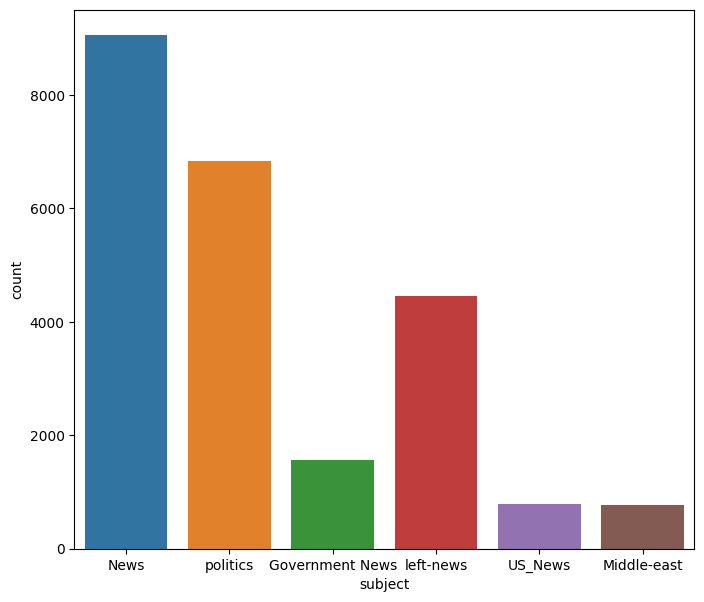

In [5]:
plt.figure(figsize = (8,7))
sns.countplot(x= 'subject', data = fake)      # count plot for differnet subjects

In [6]:
textfake = ' '.join(fake['text'].tolist())


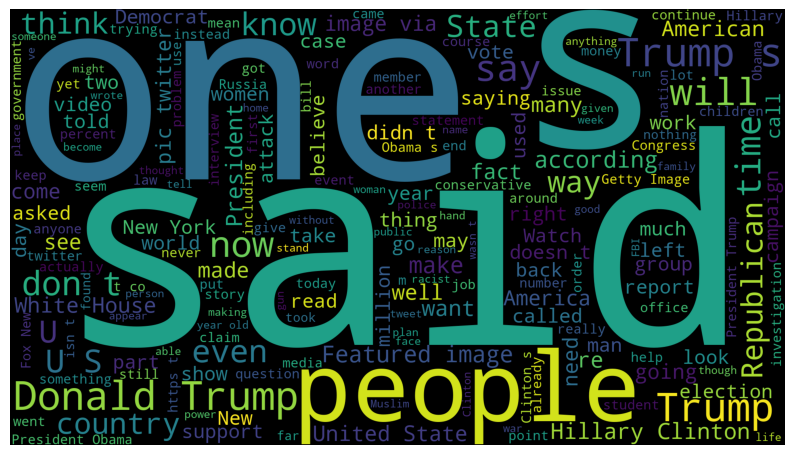

In [9]:
# making a word cloud for fake news
wcloudfake = WordCloud(width = 1920, height = 1080).generate(textfake)
plt.figure(figsize = (10,10))
plt.imshow(wcloudfake)
plt.axis('off')
plt.show()

### Exploring True news

In [15]:
true.isna().sum()      #

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

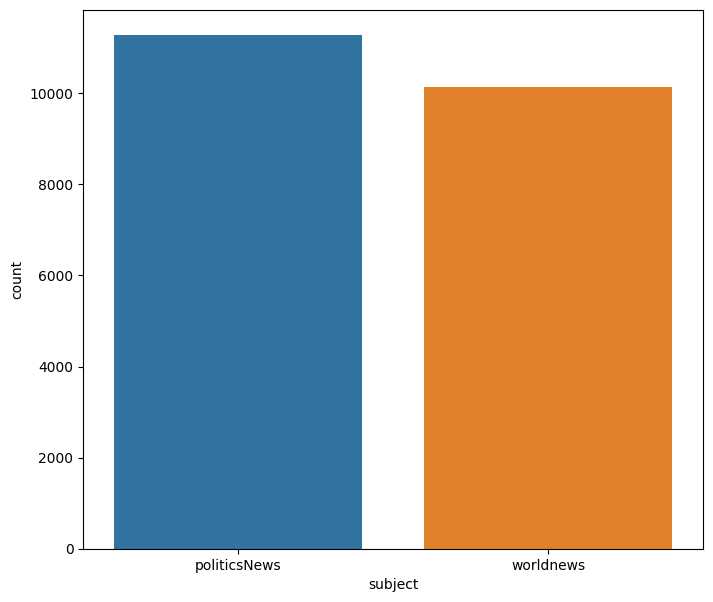

In [11]:
plt.figure(figsize = (8,7))
sns.countplot(x= 'subject', data = true)

In [12]:
texttrue = ' '.join(true['text'].tolist())

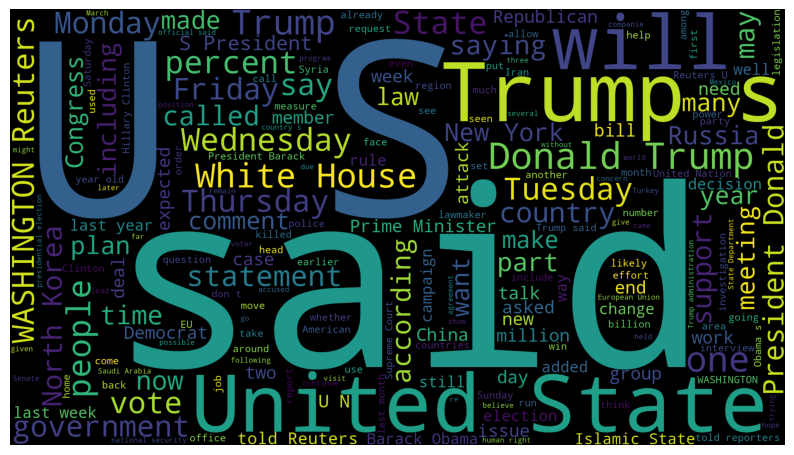

In [13]:
# building word cloud for real news
wcloudtrue = WordCloud(width = 1920, height = 1080).generate(texttrue)
plt.figure(figsize = (10,10))
plt.imshow(wcloudtrue)
plt.axis('off')
plt.show()

In [17]:
true['text'].head(20)

0     WASHINGTON (Reuters) - The head of a conservat...
1     WASHINGTON (Reuters) - Transgender people will...
2     WASHINGTON (Reuters) - The special counsel inv...
3     WASHINGTON (Reuters) - Trump campaign adviser ...
4     SEATTLE/WASHINGTON (Reuters) - President Donal...
5     WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
6     WEST PALM BEACH, Fla (Reuters) - President Don...
7     The following statements were posted to the ve...
8     The following statements were posted to the ve...
9     WASHINGTON (Reuters) - Alabama Secretary of St...
10    (Reuters) - Alabama officials on Thursday cert...
11    NEW YORK/WASHINGTON (Reuters) - The new U.S. t...
12    The following statements were posted to the ve...
13    The following statements were posted to the ve...
14     (In Dec. 25 story, in second paragraph, corre...
15    (Reuters) - A lottery drawing to settle a tied...
16    WASHINGTON (Reuters) - A Georgian-American bus...
17    The following statements were posted to th

One big difference between the word cloud for the real and the fake news is that in the word cloud for the true data we can see the source of the news i.e the publisher Reuters

### Text processing

In [232]:
true.text.values

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [233]:
# Extracting indexes of text where publidher is not mentioned
publisherNotKnown = []

for index,row in enumerate(true.text.values):
    try:
        record = row.split('-', maxsplit =1)
        record[1]
        assert(len(record[0])<120)
    except:
        publisherNotKnown.append(index)

In [234]:
len(publisherNotKnown)

222

In [235]:
pd.set_option('display.max_rows', None)
true.iloc[publisherNotKnown].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
17       The following statements were posted to the ve...
27       The following statements were posted to the ve...
40       The following statements were posted to the ve...
67        (Corrects spelling of Virginia House of Deleg...
70       The following statements were posted to the ve...
97       The following statements were posted to the ve...
122      The following statements were posted to the ve...
140      The following statements were posted to the ve...
155       (In this Dec. 13 story, corrects third paragr...
156       (In Nov 15 item, corrects third paragraph to ...
192      The following statements were posted to the ve...
222       (In this Dec. 8 story, corrects Peters’ affil.

In [236]:
true.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [237]:
true = true.drop(8970, axis = 0)

In [238]:
# extracting publisher from text and setting publisher unknown where not present 
# extracting the text without the publisher
publisher = []
article = []

for index, row in enumerate(true.text.values):
    if index in publisherNotKnown:
        article.append(row)
        publisher.append('Unknown')
        
    else:
        record = row.split('-', maxsplit = 1)
        article.append(record[1].strip())
        publisher.append(record[0].strip())

In [239]:
publisher

['WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'SEATTLE/WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla./WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla (Reuters)',
 'Unknown',
 'Unknown',
 'WASHINGTON (Reuters)',
 '(Reuters)',
 'NEW YORK/WASHINGTON (Reuters)',
 'Unknown',
 'Unknown',
 'Unknown',
 '(Reuters)',
 'WASHINGTON (Reuters)',
 'Unknown',
 '(Reuters)',
 '(Reuters)',
 'WASHINGTON (Reuters)',
 'NEW YORK (Reuters)',
 '(Reuters)',
 'WASHINGTON (Reuters)',
 'LIMA (Reuters)',
 'WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'Unknown',
 'MEXICO CITY (Reuters)',
 'WASHINGTON (Reuters)',
 '(Reuters)',
 'WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'VATICAN CITY (Reuters)',
 'KING OF PRUSSIA, Pennsylvania/WASHINGTON (Reuters)',
 '(Reuters)',
 'WASHINGTON (Reuters)',
 '(Reuters)',
 'NEW YORK (Reuters)',
 'WASHINGTON (Reuters)',
 'Unknown',
 'WASHINGTON (Reuters)',
 'NEW YORK (Reuters)',
 'WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)

In [240]:
article

['The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific resear

In [241]:
# creating new variables publisher and article and storing values into them
true['publisher'] = publisher
true['article'] = article

In [242]:
true. head()

,title,text,subject,date,publisher,article
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",WASHINGTON (Reuters),Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",WASHINGTON (Reuters),Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters),President Donald Trump called on the U.S. Post...


In [243]:
true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21416 entries, 0 to 21416
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      21416 non-null  object
 1   text       21416 non-null  object
 2   subject    21416 non-null  object
 3   date       21416 non-null  object
 4   publisher  21416 non-null  object
 5   article    21416 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [244]:
true.shape

(21416, 6)

In [245]:
# dropping text column because we have the values in the article coulmn
true.drop(['text'],axis = 1, inplace = True)

In [246]:
 [index for index,text in enumerate(true.article.tolist()) if str(text).strip() == ""]

[]

In [247]:
# finding rows with empty values in text column in fake dataset
emptyText = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [248]:
fake.iloc[emptyText]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
11241,BOOM! SEAN SPICER: “Trump Sold Hotels In Russi...,,politics,"Mar 31, 2017"
11247,MICHAEL FLYNN’S LAWYER Releases Statement Scor...,,politics,"Mar 30, 2017"
11249,ROB SCHNEIDER Nails The Russia Conspiracy Theo...,,politics,"Mar 30, 2017"
11267,TREY GOWDY ON SPYING ON AMERICAN CITIZENS…Like...,,politics,"Mar 28, 2017"
11268,SEAN SPICER CALLS OUT Race Baiting Journalist:...,,politics,"Mar 28, 2017"


In [249]:
[index for index,text in enumerate(fake.text.tolist())]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [250]:
# combining the title and text column
true['article'] = true['title'] + ' ' + true['article']
fake['article'] = fake['title'] + ' ' + fake['text']

In [251]:
fake.drop(['text'], axis =1, inplace = True)

In [252]:
# conaveting text to lower
true['article'] = true['article'].apply(lambda x: str(x).lower())
fake['article'] = fake['article'].apply(lambda x: str(x).lower())


In [253]:
# creating target variable
true['isFake'] = 0
fake['isFake'] = 1

In [81]:
true.head()

,title,subject,date,publisher,article,isReal
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",WASHINGTON (Reuters),"as u.s. budget fight looms, republicans flip t...",1
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",WASHINGTON (Reuters),u.s. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),senior u.s. republican senator: 'let mr. muell...,1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",WASHINGTON (Reuters),fbi russia probe helped by australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters),trump wants postal service to charge 'much mor...,1


In [80]:
fake.head()

,title,subject,date,article,isReal
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",donald trump sends out embarrassing new year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",drunk bragging trump staffer started russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",sheriff david clarke becomes an internet joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",trump is so obsessed he even has obama’s name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",pope francis just called out donald trump dur...,0


### Conacatnate dataframes

In [254]:
# concat datasets
df = pd.concat([true, fake], axis = 0)

In [255]:
# Keeping the columns article and isFake for the model
df = df[['article', 'isFake']]
df.sample(10)

,article,isFake
10881,president trump’s powerful first commencement ...,1
22897,will ‘trumponomics’ bankrupt america? 21st cen...,1
8429,netanyahu says ‘respected western opinion lea...,1
2520,republican lawmakers rally around sessions as ...,0
17867,president trump weighs executive order on welf...,1
18293,chevy chase admits to using position at snl to...,1
4145,watch: trump tries to kiss little girl on the...,1
13949,russia takes tokyo to task over defense allian...,0
9557,exclusive: u.s. plans new wave of immigrant de...,0
11711,sit down and shut up! senator whack-job warren...,1


In [256]:
# creating a function to remove special characters from data
import re

def remove_special_characters(text):
    # define the pattern of special characters to remove
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text


In [257]:
df['article'] = df['article'].apply(remove_special_characters)

In [258]:
y = df['isFake'].values
X = [sent.split(' ') for sent in df['article']]

In [259]:
from gensim.models import Word2Vec

In [260]:
# building the word to vec model
DIM = 100
w2v = Word2Vec(sentences=X, vector_size = DIM, window= 10,min_count= 1)

In [261]:
len(w2v.wv)

234799

In [262]:
# looking at the vocab
w2v.wv.key_to_index

{'the': 0,
 'to': 1,
 '': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 

In [114]:
w2v.wv.most_similar('us')

[('american', 0.5809739232063293),
 ('iranian', 0.514043390750885),
 ('nato', 0.5002260804176331),
 ('washingtons', 0.49506327509880066),
 ('iran', 0.4815934896469116),
 ('russian', 0.47077399492263794),
 ('natos', 0.4679752588272095),
 ('countrys', 0.45318081974983215),
 ('pakistan', 0.44043758511543274),
 ('turkish', 0.43751034140586853)]

In [263]:
# fitting the tokenizer on text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [264]:
X = tokenizer.texts_to_sequences(X)

In [265]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 '': 3,
 'of': 4,
 'a': 5,
 'and': 6,
 'in': 7,
 'that': 8,
 'on': 9,
 'for': 10,
 's': 11,
 'is': 12,
 'he': 13,
 'said': 14,
 'trump': 15,
 'it': 16,
 'with': 17,
 'was': 18,
 'as': 19,
 'his': 20,
 'by': 21,
 'has': 22,
 'be': 23,
 'have': 24,
 'not': 25,
 'from': 26,
 'this': 27,
 'at': 28,
 'are': 29,
 'who': 30,
 'us': 31,
 'an': 32,
 'they': 33,
 'i': 34,
 'but': 35,
 'we': 36,
 'would': 37,
 'president': 38,
 'about': 39,
 'will': 40,
 'their': 41,
 'had': 42,
 'you': 43,
 't': 44,
 'been': 45,
 'were': 46,
 'people': 47,
 'more': 48,
 'or': 49,
 'after': 50,
 'which': 51,
 'she': 52,
 'her': 53,
 'one': 54,
 'if': 55,
 'its': 56,
 'out': 57,
 'all': 58,
 'what': 59,
 'state': 60,
 'when': 61,
 'new': 62,
 'also': 63,
 'up': 64,
 'there': 65,
 'over': 66,
 'no': 67,
 'house': 68,
 'donald': 69,
 'our': 70,
 'states': 71,
 'clinton': 72,
 'obama': 73,
 'government': 74,
 'can': 75,
 'just': 76,
 'him': 77,
 'so': 78,
 'than': 79,
 'republican': 80,
 'other':

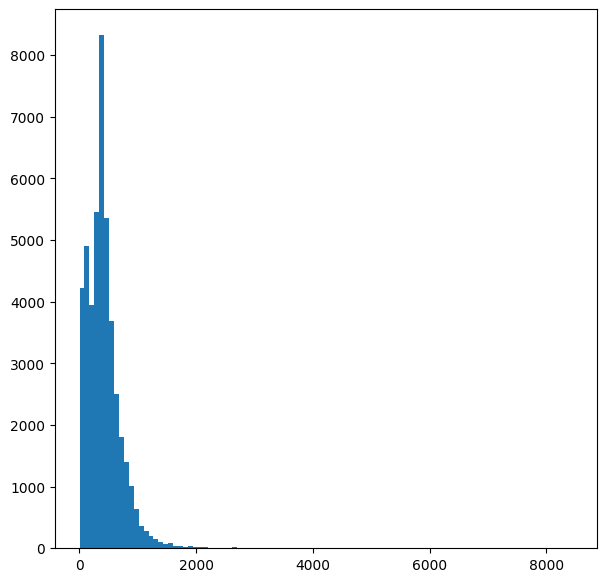

In [266]:
plt.figure(figsize = (7,7))
plt.hist([len(x) for x in X], bins =100)
plt.show()

In [267]:
a = np.array([len(x) for x in X])
len(a[a>1000])

1739

In [268]:
# padding with max length 1000
X = pad_sequences(X, maxlen=1000)

In [269]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [270]:
# defining a function for weights to feed into the model
def weights(model):
    weight = np.zeros((vocab_size, DIM))
    for word, i in vocab.items():
        weight[i] = model.wv[word]
    return weight

In [271]:
# the wieghts come from the w2v model
embeddingVectors = weights(w2v)

In [272]:
embeddingVectors.shape

(234800, 100)

### Building model

In [321]:
# defining model architecture
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embeddingVectors], input_length = 1000, trainable = False))
model.add(LSTM(128))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [322]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 1000, 100)         23480000  
                                                                 
 lstm_9 (LSTM)               (None, 128)               117248    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,597,377
Trainable params: 117,377
Non-trainable params: 23,480,000
_________________________________________________________________


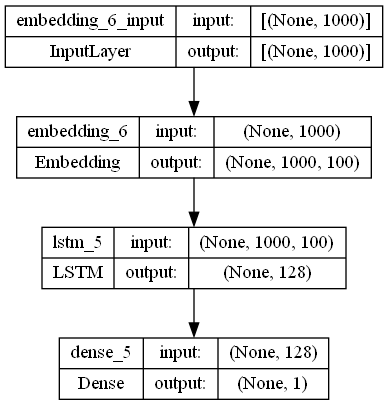

In [286]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

### Splitting data

In [275]:
# splitting data 
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 23)

print(train_X.shape)
print(train_y.shape)
print(valid_X.shape)
print(valid_y.shape)

(31427, 1000)
(31427,)
(13470, 1000)
(13470,)


### Training and prediction

In [302]:
# fitting the model
model.fit(train_X,train_y, epochs = 3)

Epoch 1/3
983/983 [==============================] - 463s 471ms/step - loss: 0.1690 - accuracy: 0.9648
Epoch 2/3
983/983 [==============================] - 442s 450ms/step - loss: 0.1762 - accuracy: 0.9649
Epoch 3/3
983/983 [==============================] - 438s 445ms/step - loss: 0.1585 - accuracy: 0.9679


In [303]:
# making prediction and finding accuracy
y_pred = (model.predict(valid_X) >= 0.5).astype(int)
accuracy_score(valid_y, y_pred)

421/421 [==============================] - 80s 187ms/step


0.9705270972531551

In [304]:
# making the classification report
print(classification_report(valid_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6432
           1       0.97      0.98      0.97      7038

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470



In [287]:
# Evaluate the performance of the model
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred, average='weighted')
recall = recall_score(valid_y, y_pred, average='weighted')
f1 = f1_score(valid_y, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9927988121752042
Precision: 0.9928168791851828
Recall: 0.9927988121752042
F1-Score: 0.9927977020001805


### Naive model

In [319]:
from sklearn.dummy import DummyClassifier

# Create a baseline model that always predicts the mode of the target variable
model = DummyClassifier(strategy='most_frequent')

# Fit the model to the data
model.fit(X, y)

# Make predictions on the data
y_pred = model.predict(X)

# Evaluate the performance of the model
accuracy = model.score(X, y)
print("Accuracy for naive model is:", accuracy)

Accuracy for naive model is: 0.5229970822103926


### Model improvement

In [323]:
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embeddingVectors], input_length = 1000, trainable = False))
model.add(LSTM(128, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 1000, 100)         23480000  
                                                                 
 lstm_10 (LSTM)              (None, 128)               117248    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,597,377
Trainable params: 117,377
Non-trainable params: 23,480,000
_________________________________________________________________


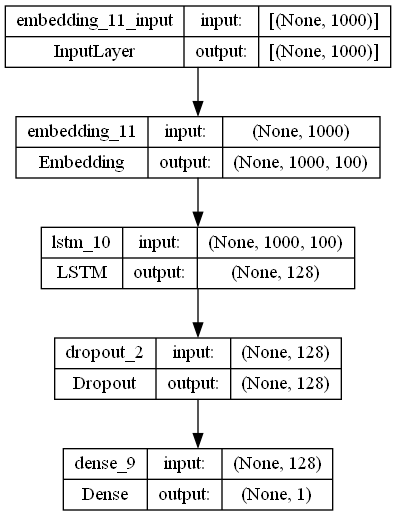

In [324]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [325]:
model.fit(train_X,train_y, validation_data = (valid_X, valid_y), epochs = 3)

Epoch 1/3
983/983 [==============================] - 671s 678ms/step - loss: 0.4034 - accuracy: 0.9365 - val_loss: 0.3482 - val_accuracy: 0.9180
Epoch 2/3
983/983 [==============================] - 534s 544ms/step - loss: 0.2186 - accuracy: 0.9496 - val_loss: 0.1999 - val_accuracy: 0.9604
Epoch 3/3
983/983 [==============================] - 705s 717ms/step - loss: 0.2537 - accuracy: 0.9574 - val_loss: 0.2052 - val_accuracy: 0.9725


In [329]:
# making prediction and finding accuracy
y_pred = (model.predict(valid_X) >= 0.5).astype(int)
print('Accuracy of the deep learning model is:', round(accuracy_score(valid_y, y_pred),4))

421/421 [==============================] - 64s 152ms/step
Accuracy of the deep learning model is: 0.9725


In [327]:
# making the classification report
print(classification_report(valid_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6432
           1       0.97      0.97      0.97      7038

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470



In [333]:
# Evaluate the performance of the model
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred, average='weighted')
recall = recall_score(valid_y, y_pred, average='weighted')
f1 = f1_score(valid_y, y_pred, average='weighted')
print("Accuracy of the deep learning model is:", round(accuracy,4))
print("Precision of the deep learning model is:", round(precision,4))
print("Recall of the deep learning model is:", round(recall,4))
print("F1-score of the deep learning model is::", round(f1,4))

Accuracy of the deep learning model is: 0.9725
Precision of the deep learning model is: 0.9725
Recall of the deep learning model is: 0.9725
F1-score of the deep learning model is:: 0.9725
